<a href="https://colab.research.google.com/github/YZabolotnii/Sales_analysis_py/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount("/content/drive")
%cd /content/drive/MyDrive/MA_papka

countries = pd.read_csv("countries.csv")
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")

Mounted at /content/drive
/content/drive/MyDrive/MA_papka


## Data overview

In [ ]:
def df_overview(df, name):
    print(f"\n=== {name} ===")
    print("Перші кілька рядків:")
    print(df.head())
    print("\nІнформація:")
    print(df.info())
    print("\nПропущені значення:")
    print(df.isna().sum())
    print()
    print(df.isna().sum() / df.shape[0] * 100)
    print("\nДублікати:", df.duplicated().sum())

for name, df in [("Countries", countries), ("Events", events), ("Products", products)]:
    df_overview(df, name)


=== Countries ===
Перші кілька рядків:
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

Інформація:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None

Пропущені значення:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

name          0.000000
alpha-2       0.4016

In [ ]:
def df_describe(df, name):
    print(f"\n=== {name} ===")
    print(df.describe())

for name, df in [("Countries", countries), ("Events", events), ("Products", products)]:
    df_describe(df, name)


=== Countries ===
               name alpha-2 alpha-3  region          sub-region
count           249     248     249     248                 248
unique          249     248     249       5                  17
top     Afghanistan      AF     AFG  Africa  Sub-Saharan Africa
freq              1       1       1      60                  53

=== Events ===
           Order ID   Product ID   Units Sold   Unit Price    Unit Cost
count  1.330000e+03  1330.000000  1328.000000  1330.000000  1330.000000
mean   5.412048e+08  5788.096241  4952.201807   264.893541   187.246812
std    2.573882e+08  2820.728878  2905.198996   217.323460   176.158873
min    1.006406e+08  1270.000000     2.000000     9.330000     6.920000
25%    3.190004e+08  3127.000000  2356.750000    81.730000    35.840000
50%    5.387164e+08  5988.000000  4962.000000   154.060000    97.440000
75%    7.544628e+08  8681.000000  7459.500000   437.200000   263.330000
max    9.998797e+08  8969.000000  9999.000000   668.270000   524.9600

### **Змінні**
#### **Products**
   id - ідентифікатор товару <br>
   item_type - назва товару
#### **Countries**
   name - назва країни <br>
   alpha-2 - дволітерні коди країн <br>
   alpha-3 - трьохлітерні коди країн <br>
   region - назва регіону <br>
   sub-region - назва субрегіону
#### **Events**
   Order ID - ідентифікатор замовлення <br>
   Order Date -  дата замовлення - **привести до дати** <br>
   Ship Date - дата доставки - **привести до дати** <br>
   Order Priority - пріоритет замовлення <br>
   Country Code - код країни <br>
   Product ID - ідентифікатор товару <br>
   Sales Channel - канал продажу <br>
   Units Sold - кількість проданого товару - **привести до int** <br>
   Unit Price - вартість товару <br>
   Unit Cost - витрати на товар <br>
#### **Joins:** <br>
Events. Country Code => Countries. alpha-3 <br>
Events. Product ID => Products. id

In [ ]:
# Delete due to a small percentage
countries.dropna(inplace=True)

# Replace with "Unknown" because of the large percentage of missing values
events.fillna({'Country Code': 'Unknown'}, inplace=True)

# Delete due to a small percentage
events.dropna(inplace=True)

print(events.isna().sum() / df.shape[0] * 100)

order_id          0.0
order_date        0.0
ship_date         0.0
order_priority    0.0
country_code      0.0
product_id        0.0
sales_channel     0.0
units_sold        0.0
unit_price        0.0
unit_cost         0.0
shipping_time     0.0
total_revenue     0.0
total_cost        0.0
total_profit      0.0
dtype: float64


In [ ]:
# Check dublicates
for name, df in [("Countries", countries), ("Events", events), ("Products", products)]:
    print(f"Дублікати у {name}: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)

Дублікати у Countries: 0
Дублікати у Events: 0
Дублікати у Products: 0


In [ ]:
# Converting to a normal header view
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

clean_columns(products)
clean_columns(events)
clean_columns(countries)

countries.rename(columns={'alpha-3': 'country_code'}, inplace=True)
products.rename(columns={'id': 'product_id'}, inplace=True)

print(products.head())
print(events.head())
print(countries.head())

   product_id        item_type
0        2103           Cereal
1        7940        Household
2        2455          Clothes
3        1270        Beverages
4        8681  Office Supplies
    order_id order_date  ship_date order_priority country_code  product_id  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  sales_channel  units_sold  unit_price  unit_cost  
0        Online         650      205.70     117.11  
1       Offline        1993      205.70     117.11  
2        Online        4693      668.27     502.54  
3        Online        1171      109.28      35.84  
4       Offline        7648       47.45      31.79  
             name alpha-2 c

In [ ]:
# Convert the date column to datetime
events['order_date'] = pd.to_datetime(events['order_date'])
events['ship_date'] = pd.to_datetime(events['ship_date'])

# Add interval
events['shipping_time'] = (events['ship_date'] - events['order_date']).dt.days

# Add additional money metrics
events['total_revenue'] = (events['unit_price'] * events['units_sold'])
events['total_cost'] = (events['unit_cost'] * events['units_sold'])
events['total_profit'] = (events['total_revenue'] - events['total_cost'])

# Convert to optimize type
events["units_sold"] = (events["units_sold"]).astype("Int32")
events.dtypes

,0
order_id,int64
order_date,datetime64[ns]
ship_date,datetime64[ns]
order_priority,object
country_code,object
product_id,int64
sales_channel,object
units_sold,Int32
unit_price,float64
unit_cost,float64


## **Data analysis and visualization**

In [ ]:
# Delete unuse column
# countries.drop(columns=['alpha-2'], inplace=True)

# Join to 1 table
left_join_events_products = pd.merge(events, products, on="product_id", how="left")
left_join_events_all = pd.merge(left_join_events_products, countries, on="country_code", how="left")
left_join_events_all.fillna('Unknown', inplace=True)
print(left_join_events_all)


       order_id order_date  ship_date order_priority country_code  product_id  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1325  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1326  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1327  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1328  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1329  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     sales_channel  units_s

In [ ]:
# Total number of countries covered
count_countries = left_join_events_all["name"].nunique()
print(f"Загальна кількість охоплених країн: {count_countries}")

# Total number of orders
count_orders = left_join_events_all['order_id'].nunique()
print(f'Загальну кількість замовлень: {count_orders}')

# Total number of goods sold
total_units_sold = left_join_events_all['units_sold'].sum()
print(f"Загальна кількість проданих товарів: {total_units_sold}")

# Total amount of income
total_revenue = left_join_events_all['total_revenue'].sum()
print(f"Загальна сума доходів: {total_revenue}")

# Total expenses
total_cost = left_join_events_all['total_cost'].sum()
print(f"Загальна сума витрат: {total_cost}")

# Total profit
total_profit = left_join_events_all['total_profit'].sum()
print(f"Загальний прибуток: {total_profit}")

Загальна кількість охоплених країн: 46
Загальну кількість замовлень: 1330
Загальна кількість проданих товарів: 6586448
Загальна сума доходів: 1704628370.65
Загальна сума витрат: 1202785737.5299997
Загальний прибуток: 501842633.11999995


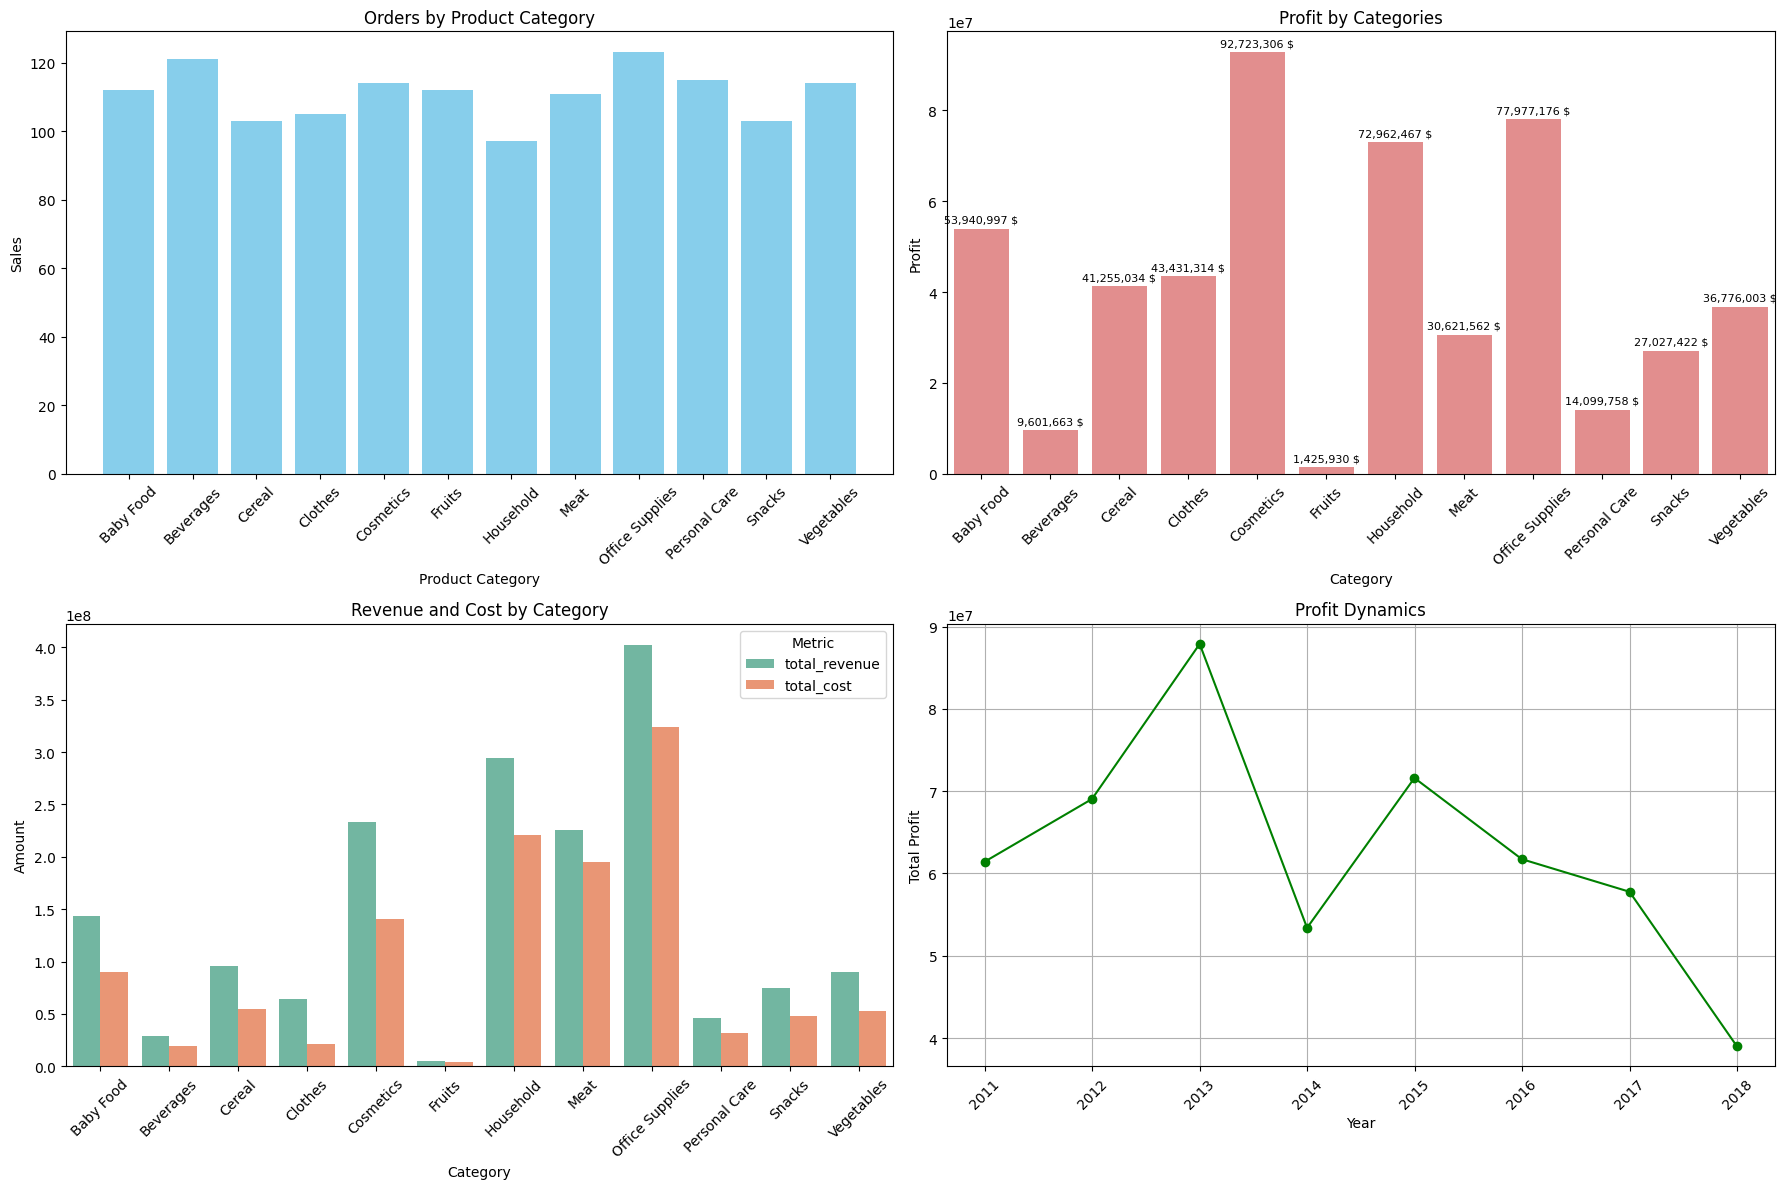

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.tight_layout(pad=5.0)

# 1. Orders by Product Category
sales_product_cnt = left_join_events_all.groupby('item_type')['order_id'].count().reset_index()
axes[0, 0].bar(sales_product_cnt['item_type'], sales_product_cnt['order_id'], color='skyblue')
axes[0, 0].set_title("Orders by Product Category")
axes[0, 0].set_xlabel("Product Category")
axes[0, 0].set_ylabel("Sales")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Profit by Categories
profit_category = left_join_events_all.groupby('item_type')['total_profit'].sum().reset_index()
sns.barplot(x="item_type", y="total_profit", data=profit_category, ax=axes[0, 1], color="lightcoral")
axes[0, 1].set_title("Profit by Categories")
axes[0, 1].set_xlabel("Category")
axes[0, 1].set_ylabel("Profit")
axes[0, 1].tick_params(axis='x', rotation=45)

for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt="{:,.0f} $", label_type="edge", padding=3, fontsize=8)

# 3. Revenue and Cost by Category
summary_by_category = left_join_events_all.groupby('item_type')[['total_revenue', 'total_cost']].sum().reset_index()
melted = summary_by_category.melt(
    id_vars='item_type',
    value_vars=['total_revenue', 'total_cost'],
    var_name='Metric',
    value_name='Amount'
)

sns.barplot(data=melted, x="item_type", y="Amount", hue="Metric", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Revenue and Cost by Category")
axes[1, 0].set_xlabel("Category")
axes[1, 0].set_ylabel("Amount")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title="Metric")

# 4. Sales Dynamics by Year
sales_by_year = left_join_events_all.resample(rule="YE", on="order_date")["total_profit"].sum().reset_index()
axes[1, 1].plot(sales_by_year['order_date'], sales_by_year['total_profit'], marker="o", color="green")
axes[1, 1].set_title("Profit Dynamics")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Total Profit")
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-117-178bbfd29d0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_channel_profit, x='sales_channel', y='total_revenue', palette='pastel')


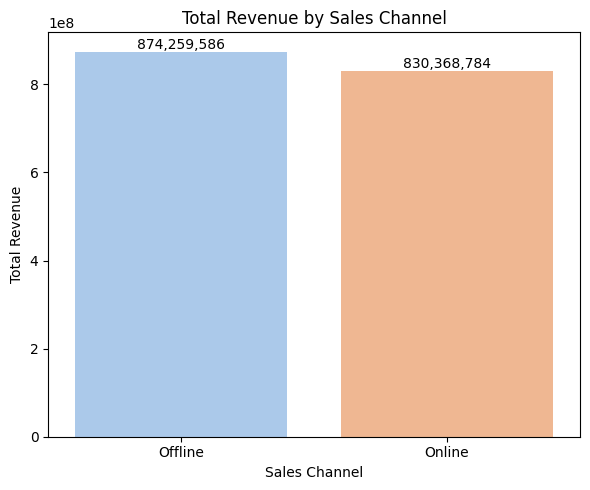

In [ ]:
# Revenue by sales_channel
left_join_events_all['sales_channel'] = left_join_events_all['sales_channel'].str.capitalize()
sales_channel_profit = left_join_events_all.groupby('sales_channel')['total_revenue'].sum().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=sales_channel_profit, x='sales_channel', y='total_revenue', palette='pastel')
plt.title("Total Revenue by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue")
for i, v in enumerate(sales_channel_profit['total_revenue']):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Average delivery time by country
avg_shipping_by_country = left_join_events_all.groupby('country_code')['shipping_time'].mean().sort_values(ascending=0)
print("Середній час доставки за країнами:\n", avg_shipping_by_country)

Середній час доставки за країнами:
 country_code
HUN        32.640000
GEO        29.695652
AUT        28.500000
SVK        28.466667
LUX        27.750000
LTU        27.560000
POL        27.464286
RUS        27.375000
MCO        26.846154
BGR        26.800000
MNE        26.678571
NLD        26.625000
BEL        26.538462
FRA        26.423077
AND        26.275000
FIN        26.217391
ALB        26.190476
ARM        26.172414
ESP        26.153846
BIH        26.060606
UKR        25.757576
BLR        25.250000
CZE        25.225806
ITA        25.200000
SWE        25.137931
ROU        24.941176
PRT        24.120000
NOR        24.100000
CHE        24.000000
SVN        23.740741
ISL        23.565217
IRL        23.533333
Unknown    23.439024
DEU        23.423077
CYP        23.233333
MKD        23.218750
GRC        23.000000
LIE        22.958333
SMR        21.700000
MLT        21.562500
LVA        20.888889
SRB        20.586207
EST        20.521739
DNK        19.692308
GBR        18.391304
HRV   

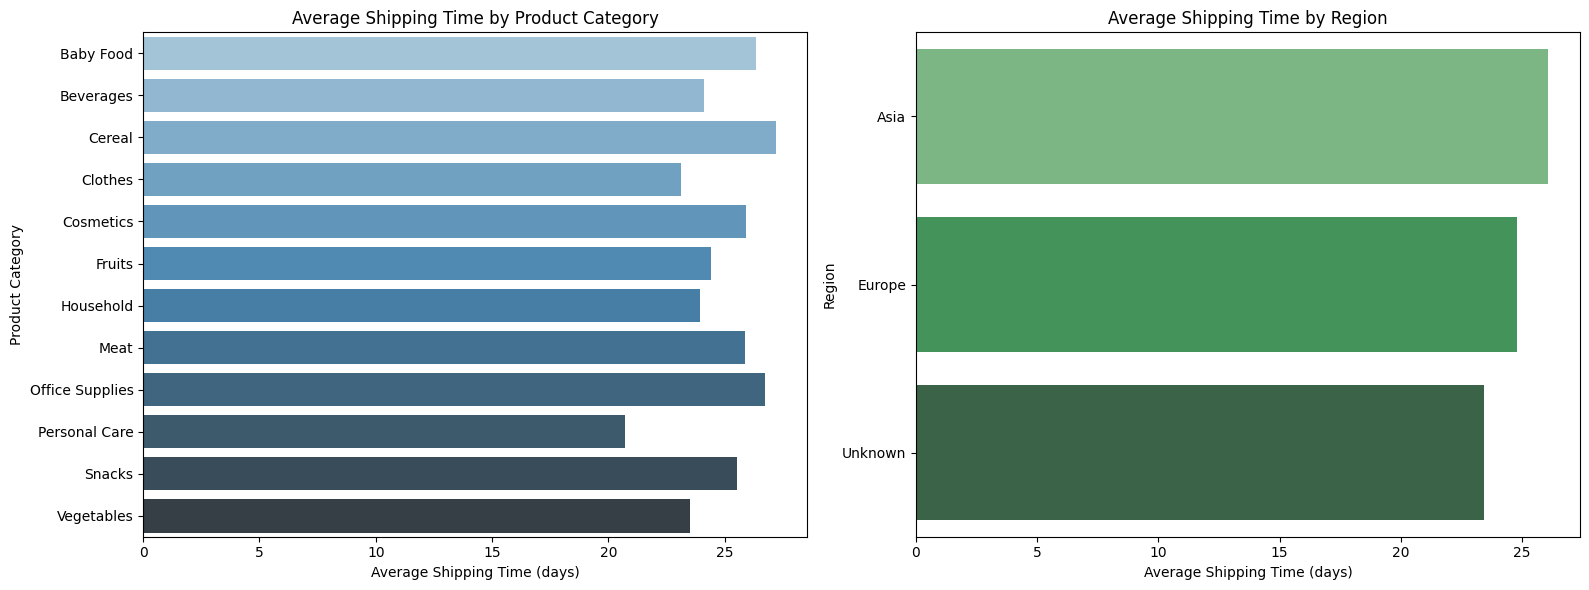

In [ ]:
# Average delivery time by category and region
avg_shipping_by_category = left_join_events_all.groupby('item_type')['shipping_time'].mean().reset_index()
avg_shipping_by_region = left_join_events_all.groupby('region')['shipping_time'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    data=avg_shipping_by_category,
    x='shipping_time',
    y='item_type',
    hue='item_type',
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('Average Shipping Time by Product Category')
axes[0].set_xlabel('Average Shipping Time (days)')
axes[0].set_ylabel('Product Category')

sns.barplot(
    data=avg_shipping_by_region,
    x='shipping_time',
    y='region',
    hue='region',
    ax=axes[1],
    palette='Greens_d'
)
axes[1].set_title('Average Shipping Time by Region')
axes[1].set_xlabel('Average Shipping Time (days)')
axes[1].set_ylabel('Region')

plt.tight_layout()
plt.show()

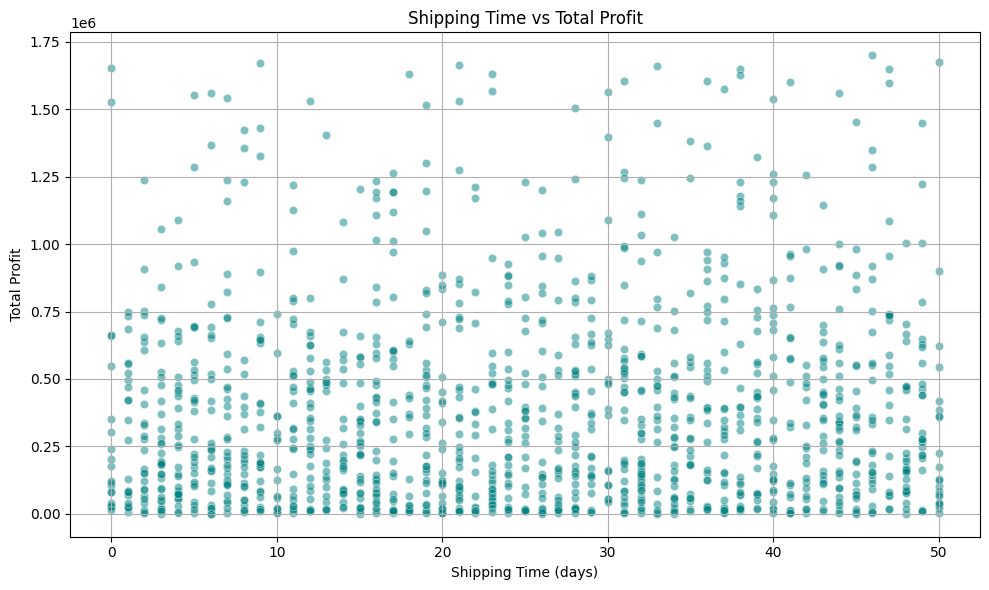

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=left_join_events_all,
    x='shipping_time',
    y='total_profit',
    alpha=0.5,
    color='teal'
)
plt.title('Shipping Time vs Total Profit')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

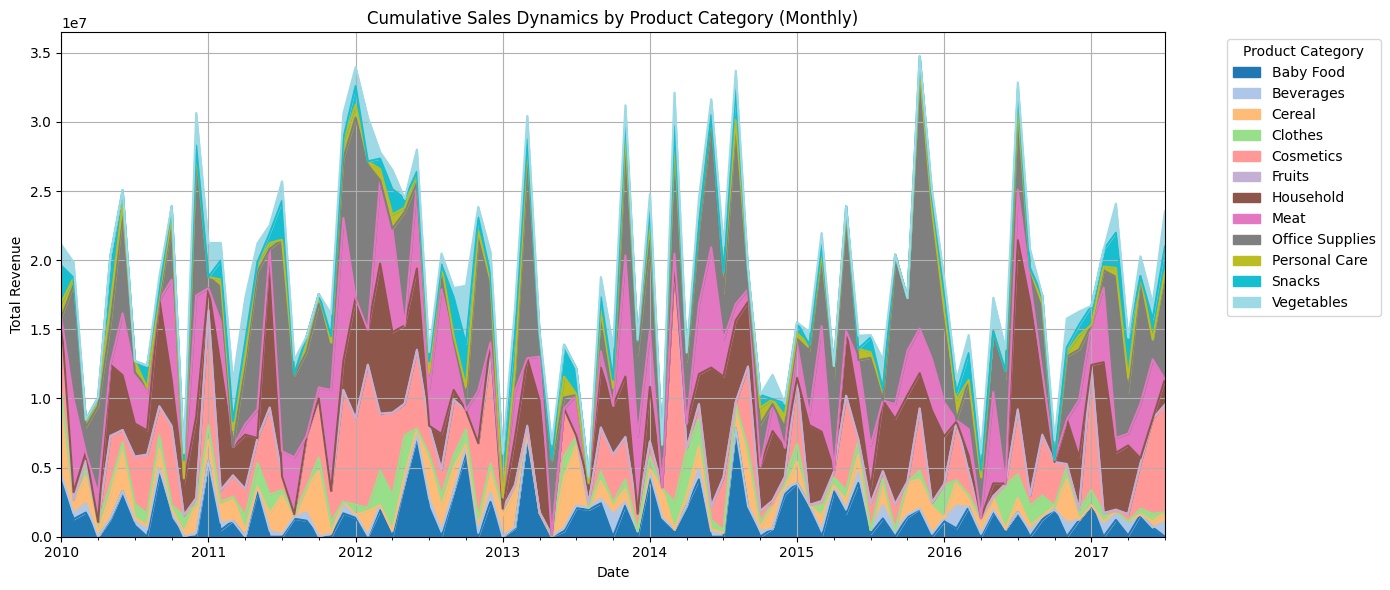

In [ ]:
# Group by date and product category, calculate the amount of income by the month in category
sales_by_category = left_join_events_all.groupby(['order_date', 'item_type'])['total_revenue'].sum().reset_index()

sales_by_category['month'] = sales_by_category['order_date'].dt.to_period('M').dt.to_timestamp()

pivot = sales_by_category.pivot_table(index='month', columns='item_type', values='total_revenue', aggfunc='sum')

plt.figure(figsize=(14, 6))
pivot.plot.area(ax=plt.gca(), stacked=True, cmap='tab20')
plt.title("Cumulative Sales Dynamics by Product Category (Monthly)")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

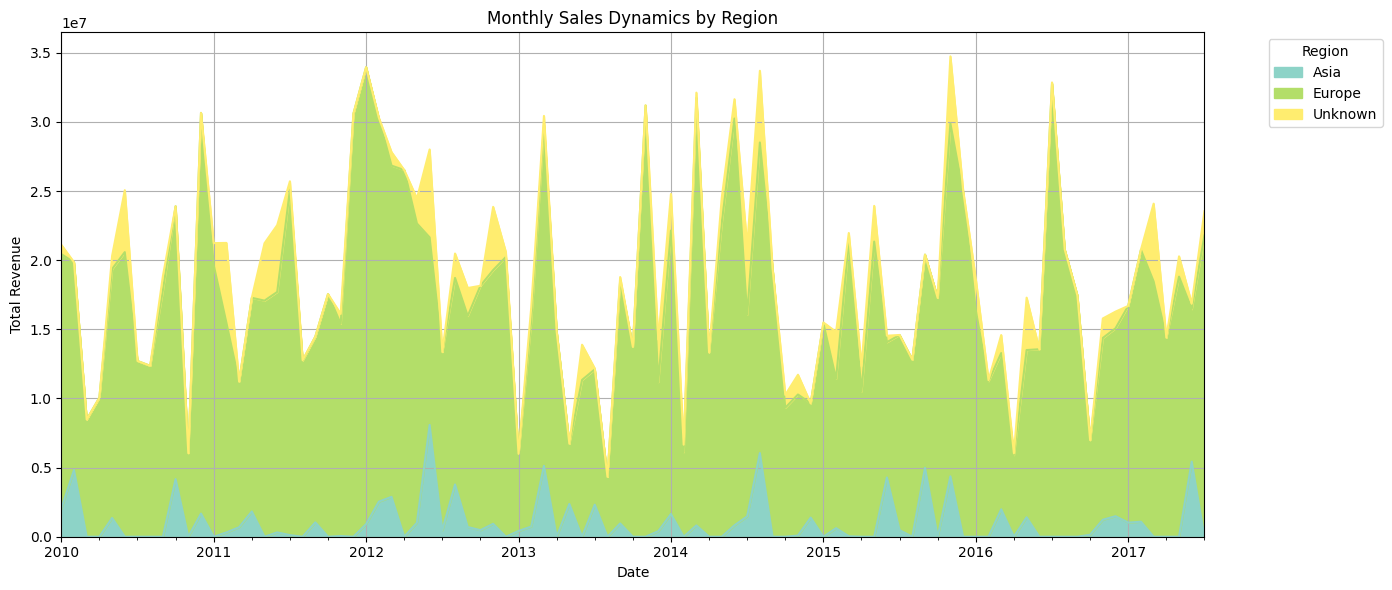

In [ ]:
sales_by_region = left_join_events_all.groupby(['region', pd.Grouper(key='order_date', freq='ME')])['total_revenue'].sum().unstack(level=0)

plt.figure(figsize=(14, 6))
sales_by_region.plot.area(ax=plt.gca(), cmap="Set3", stacked=True)
plt.title("Monthly Sales Dynamics by Region")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

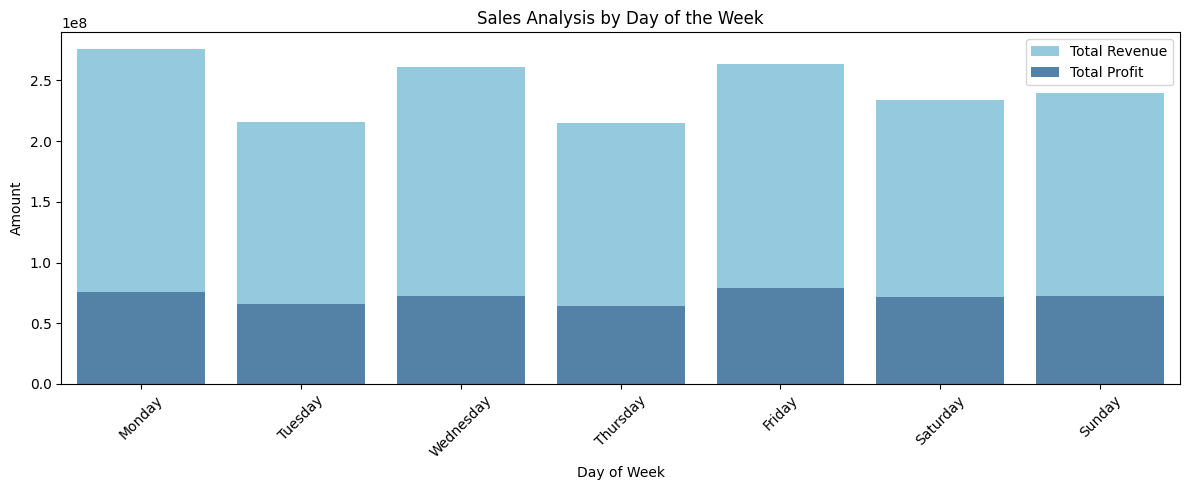

In [ ]:
left_join_events_all['weekday'] = left_join_events_all['order_date'].dt.day_name()
sales_by_weekday = left_join_events_all.groupby('weekday')[['total_revenue', 'total_profit']].sum().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sales_by_weekday['weekday'] = pd.Categorical(sales_by_weekday['weekday'], categories=days_order, ordered=True)
sales_by_weekday = sales_by_weekday.sort_values('weekday')

plt.figure(figsize=(12, 5))
sns.barplot(data=sales_by_weekday, x='weekday', y='total_revenue', color='skyblue', label='Total Revenue')
sns.barplot(data=sales_by_weekday, x='weekday', y='total_profit', color='steelblue', label='Total Profit')

plt.title("Sales Analysis by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Summary**

The following conclusions can be drawn:
* Total number of countries covered: 46
* Total number of orders: 1330
* Total number of products sold: 6586448
* Total income: 1704628370.65
* Total expenses: 1202785737.53
* Total profit: 501842633.12 <br>

The number of orders by category is relatively equal, with the highest number in **Office Supplies** and the lowest in **Household**. <br>
Cosmetics brings the most profit, while Fruits brings the least. <br>
The most profitable year was **2013**, and then in **2015** there was a gradual decrease in profits. <br>
The sales channels have **almost equal revenue**. <br>
**Hungary** has the highest average interval between order and delivery: **32.64 days**, while **Croatia** has the lowest: **18.2 days**. Also, the delivery interval **does not affect the total revenue**. <br>
The trend with a sharp increase in total revenue is mainly due to the fact that certain categories are gaining demand (Office Supplies, Cosmetics, Household, etc.) <br>
The breakdown by day of the week is also relatively **equal in terms of revenue and profit**, with **Monday** being the most profitable and **Tuesday and Wednesday** the least profitable.